### Here you will gonna work with & learn about

#### Ensemble Learning - Bagging

#### Ensemble Learning - AdaBoosting

#### Ensemble Learning - GradientBoost

#### Ensemble Learning - XGBoost    xtreeme gradient boost

 ####      Ensemble RandomForest Classifier

In [1]:
# check this video for clear understanding    :     https://datamentor.ai/courses/1656277/lectures/43772096

Here we are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. For more details on the dataset, 

    please see source at https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Activities:
Data Pre-processing

Building Machine Learning models:

a. Decision Tree

b. Regularization to Prune Decision Tree

c. Ensemble models

i) Bagging

ii) AdaBoosting

iii) GradientBoost

iv) XGBoost

v) Random Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot

from sklearn import tree
from os import system



In [3]:
crdata = pd.read_csv('credit.csv')       # storing our data in of credit in 'crdata'

In [4]:
crdata.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [5]:
crdata.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [6]:
crdata.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [7]:
crdata.shape

(1000, 17)

In [8]:
crdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [9]:
# # now if you see clearly here python sees categorial data into object         so let's convert  object - categorial

# for i in crdata.columns:                  # Loop through all columns in the dataframe
#     if crdata[i].dtypes == 'object':      # Only apply for columns with categorical strings
#         crdata[i] = pd.Categorical(crdata[i])  # Replace strings with an integer

In [10]:
for feature in crdata.columns: # Loop through all columns in the dataframe
    if crdata[feature].dtype == 'object': # Only apply for columns with categorical strings
        crdata[feature] = pd.Categorical(crdata[feature])# Replace strings with an integer

In [11]:
crdata.dtypes

checking_balance        category
months_loan_duration       int64
credit_history          category
purpose                 category
amount                     int64
savings_balance         category
employment_duration     category
percent_of_income          int64
years_at_residence         int64
age                        int64
other_credit            category
housing                 category
existing_loans_count       int64
job                     category
dependents                 int64
phone                   category
default                 category
dtype: object

In [12]:
crdata.checking_balance.value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [13]:
# now let us print & see value_counts( )      for all of categorial values

print(crdata.checking_balance.value_counts())
print(crdata.credit_history.value_counts())
print(crdata.purpose.value_counts())
print(crdata.savings_balance.value_counts())
print(crdata.employment_duration.value_counts())
print(crdata.other_credit.value_counts())
print(crdata.housing.value_counts())
print(crdata.job.value_counts())
print(crdata.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [14]:
# if you see from above we have values like for example checking_balance : we have < 0 DM        274
                                                                         #         1 - 200 DM    269
                                                                         #         > 200 DM       63
        
        # & these are all not in order wise & definetly we can't feed this kind of data to machine to make 
#           them in orderwise let us us use dictionary as

In [15]:
#those features with order in their categories 

replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }


#those features with NO order in their categories                   
oneHotCols=["purpose","housing","other_credit","job"]      # creating individual column for values in the previous columns
                                                       # ex : from housing we created extra 3 new column as dummies



In [16]:
 # now let us hardly remove the manual values & then substituete our new data values that we are created

crdata=crdata.replace(replaceStruct)

crdata=pd.get_dummies(crdata, columns=oneHotCols)

crdata.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


above if you see most of our values are around 1,2,3,4,-1 but some column values are in large like for age as 67,49& so on . ususally we use scalling for these kind of problems & we will use this scalling in future of this project 

In [17]:
crdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

In [18]:
# we can't fees directly categorical values to MLA so let us now convert them into int

In [19]:
# i have spend almost an entire day to search how to convert  multiple categorial columns into int   
#       so better  understand these 2 line 

In [20]:
cat_columns = crdata.select_dtypes(['category']).columns

In [21]:
crdata[cat_columns] = crdata[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [22]:
crdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

### Splitting the data

In [23]:
x = crdata.drop('default',axis=1)
y = crdata.pop('default')

In [24]:
x

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,0,6,0,1169,0,0,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,1,48,1,5951,1,1,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,2,12,0,2096,1,2,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,0,42,1,7882,1,2,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,0,24,2,4870,1,1,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,12,1,1736,1,2,3,4,31,1,...,0,1,0,0,1,0,0,0,0,1
996,0,30,1,3857,1,1,4,4,40,1,...,0,1,0,0,1,0,1,0,0,0
997,2,12,1,804,1,0,4,4,38,1,...,0,1,0,0,1,0,0,1,0,0
998,0,45,1,1845,1,1,4,4,23,1,...,1,0,0,0,1,0,0,1,0,0


In [25]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: int64

In [26]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size =0.30 , random_state=1)

### Building Decision Tree model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [27]:
dtree = DecisionTreeClassifier(criterion='gini' , random_state=1)  # using 'gini impuruty' as index as how often a randomly

                                                    # choosen element will incorectly labelled
    
dtree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

### Scoring our Decision Tree

In [64]:
print('train score of original : '+str(dtree.score(X_train,y_train)))
print('test score of original : '+str(dtree.score(X_test,y_test)))

train score of original : 1.0
test score of original : 0.6933333333333334


here we get 100% on training data because we do not prunn the complxity of our model.   here  our model is over fitting (test score < train score) 

## Visualizing the Decision Tree

In [29]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dtree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

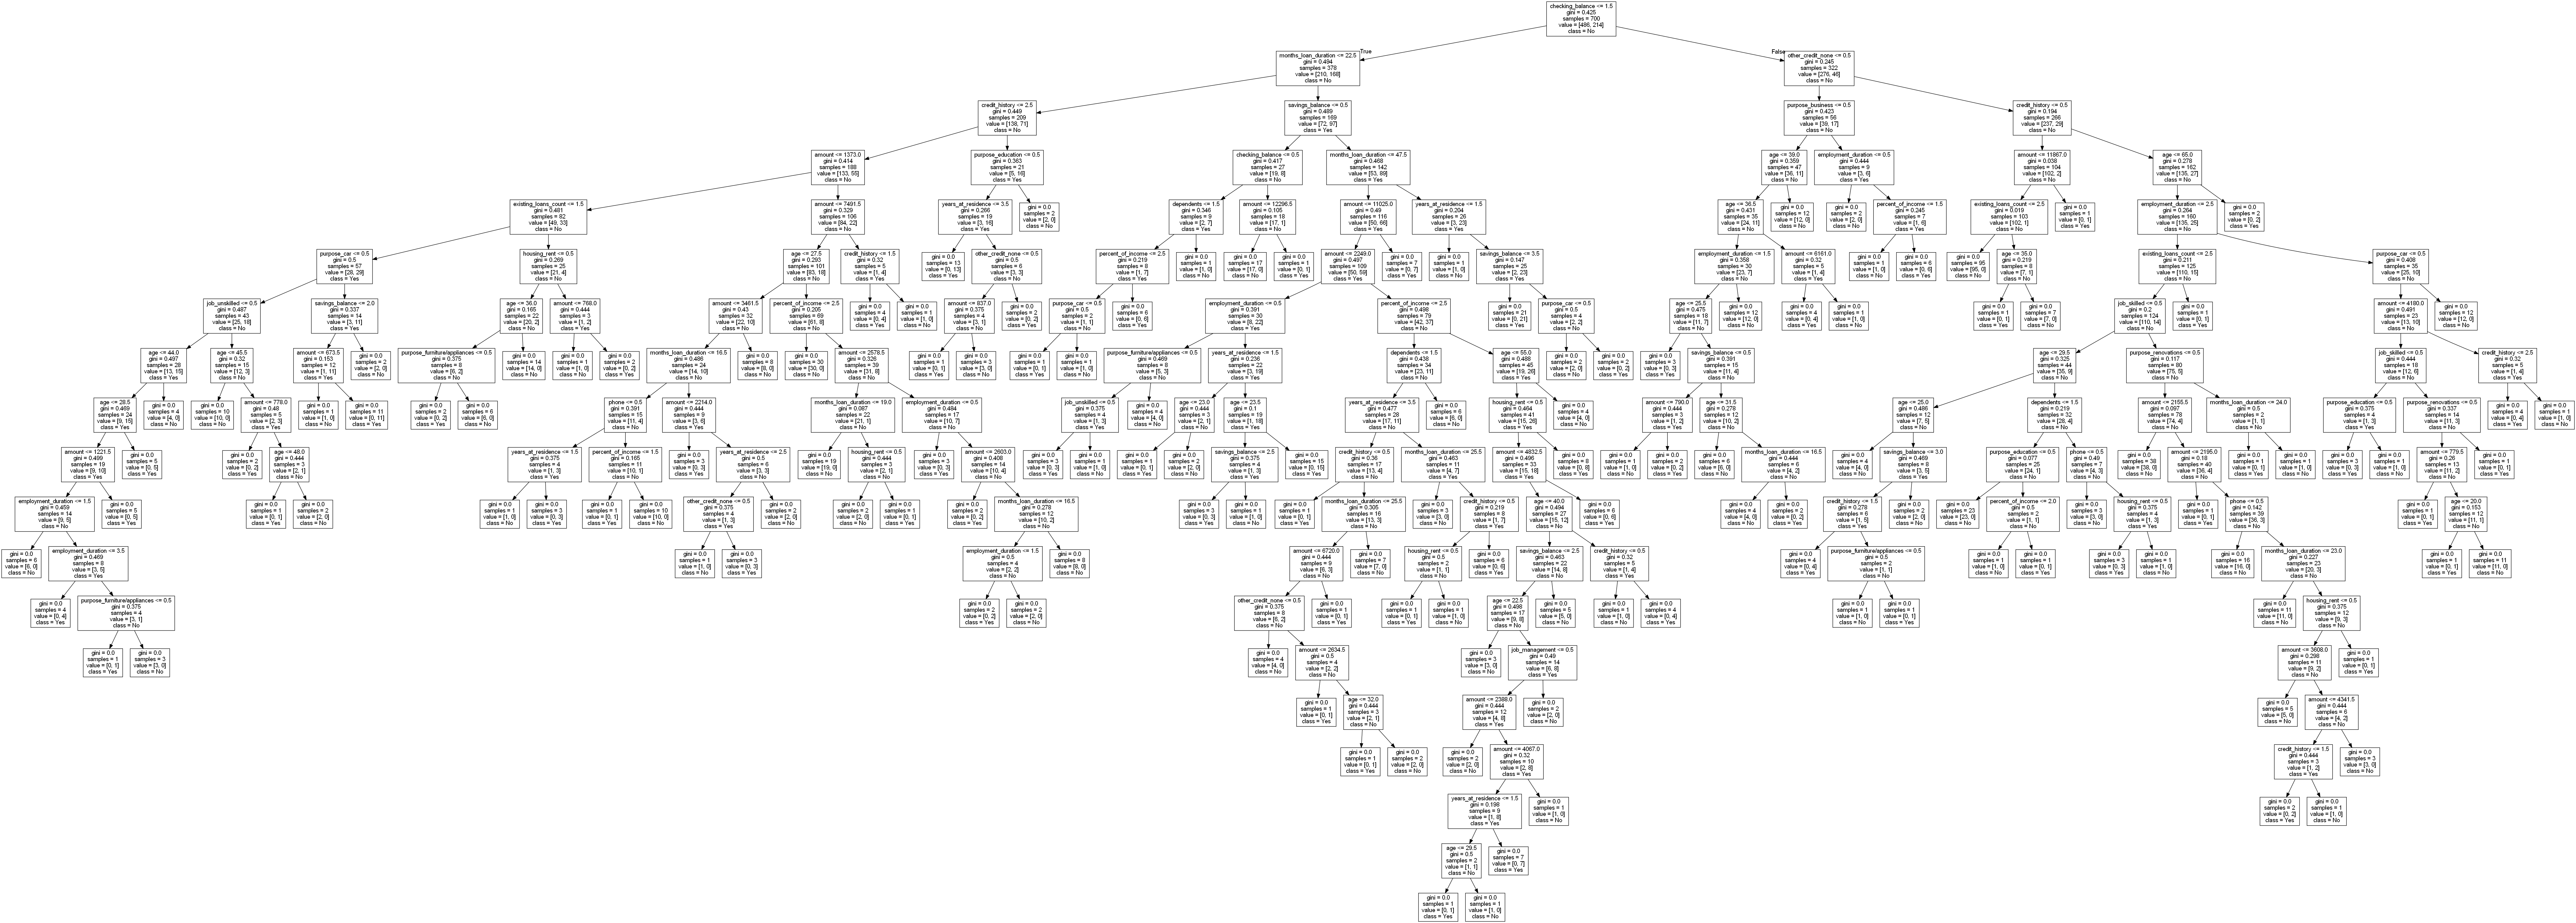

In [30]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

    


thank you SIRAJ

### Prunning: Reducing over fitting (Regularization)

In [31]:
# prunning actually cut off the extra branches        if you see above we have   decisison tree with more than 17 branches

dtree1 = DecisionTreeClassifier(criterion='gini',max_depth=3 , random_state=1)
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [32]:
print(dtree1.score(X_train, y_train))
print(dtree1.score(X_test, y_test))                   # checking scores for test & train

0.7657142857142857
0.7466666666666667


see by setting depth to 3 we got train score as 76%  & test score as 74%

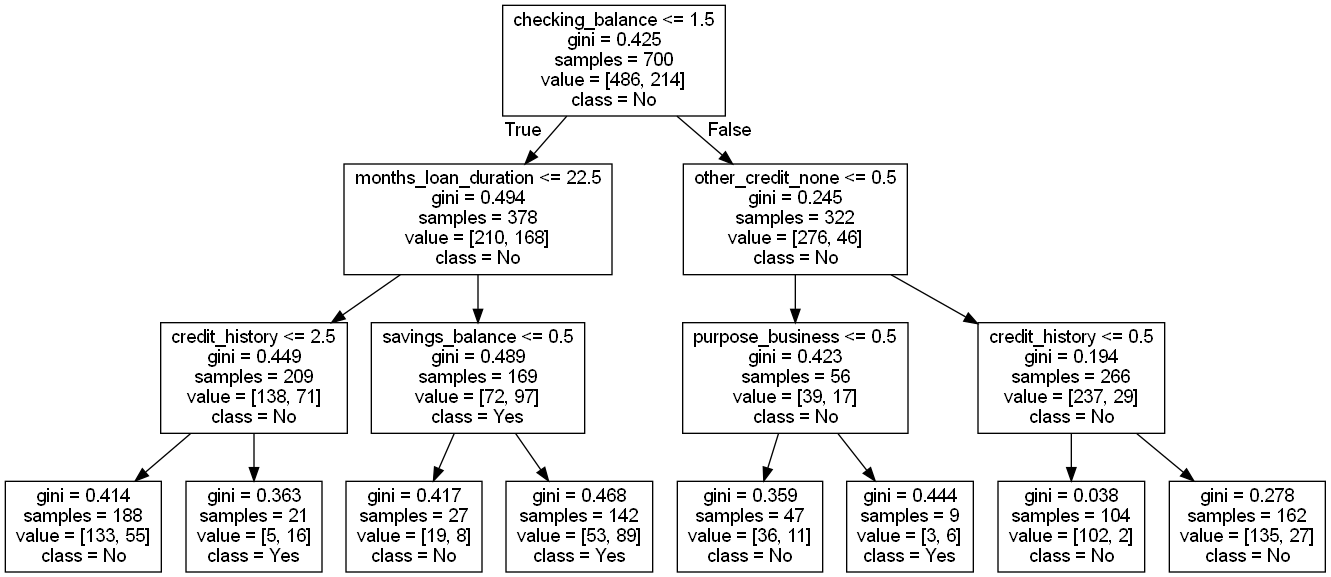

In [33]:
# now let us visualize this max depth upto 3

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dtree1, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))
    
    
    # getting values only upro 3rd branch

## Remove features

In [34]:
# importance of features(columns) in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance ) on the 
# prunned decision tree

print(pd.DataFrame(dtree1.feature_importances_  ,columns=['important'],index=X_train.columns))

                              important
checking_balance               0.492333
months_loan_duration           0.159621
credit_history                 0.172403
amount                         0.000000
savings_balance                0.077125
employment_duration            0.000000
percent_of_income              0.000000
years_at_residence             0.000000
age                            0.000000
existing_loans_count           0.000000
dependents                     0.000000
phone                          0.000000
purpose_business               0.044011
purpose_car                    0.000000
purpose_car0                   0.000000
purpose_education              0.000000
purpose_furniture/appliances   0.000000
purpose_renovations            0.000000
housing_other                  0.000000
housing_own                    0.000000
housing_rent                   0.000000
other_credit_bank              0.000000
other_credit_none              0.054507
other_credit_store             0.000000


here some of columns have 0 contribution so we don't gonna use them so just ignore them & here checking_balance have highest contribution of 0.49

hey i'm from 10) preventing OVER fitting       & i came here to show how regularization could minimize overfitting

In [48]:
new_credit_data = crdata[['checking_balance',
                         'months_loan_duration',
                         'credit_history',
                          'savings_balance',
                         'purpose_business',
                         'other_credit_none']]     # only these featurs / columns are contributing to the model

In [50]:
new_credit_data.tail()

,checking_balance,months_loan_duration,credit_history,savings_balance,purpose_business,other_credit_none
995,2,12,1,1,0,1
996,0,30,1,1,0,1
997,2,12,1,1,0,1
998,0,45,1,1,0,1
999,1,45,0,4,0,1


In [52]:
xx = new_credit_data
xx

,checking_balance,months_loan_duration,credit_history,savings_balance,purpose_business,other_credit_none
0,0,6,0,0,0,1
1,1,48,1,1,0,1
2,2,12,0,1,0,1
3,0,42,1,1,0,1
4,0,24,2,1,0,1
...,...,...,...,...,...,...
995,2,12,1,1,0,1
996,0,30,1,1,0,1
997,2,12,1,1,0,1
998,0,45,1,1,0,1


In [53]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: int64

In [54]:
xx_train,xx_test,y_train,y_test = train_test_split(xx,y,test_size=0.30,random_state=1)

In [58]:
dtn = DecisionTreeClassifier(criterion='gini',random_state=1) # building new DT with important feature data

dtn.fit(xx_train,y_train)

DecisionTreeClassifier(random_state=1)

In [62]:
print('training score of dtn : ' + str(dtn.score(xx_train,y_train)))
print('testing score of dtn : ' + str(dtn.score(xx_test,y_test)))

training score of dtn : 0.8857142857142857
testing score of dtn : 0.7033333333333334


    we got perfect fit by using Remove features 
              training score of dtn : 0.8857142857142857
              testing score of dtn : 0.7033333333333334  

    from actual score before Remove feature is
              train score of original : 1.0
              test score of original : 0.6933333333333334

0.7466666666666667


<AxesSubplot:>

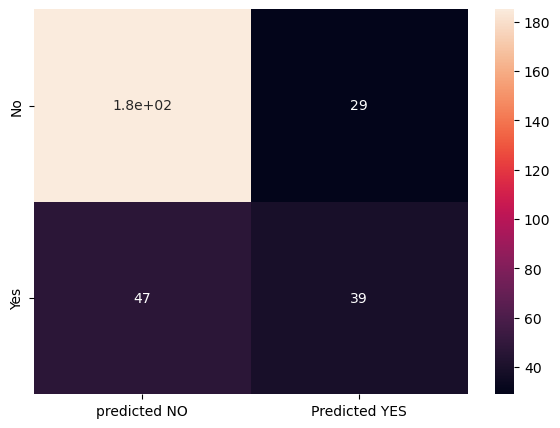

In [35]:
# let us see how many values are incorrectly labelled with help of confusion matrics after prunned the tree

print(dtree1.score(X_test,y_test))

y_pred = dtree1.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred , labels=[0,1])

df_cm =pd.DataFrame(cm, index = [i for i in ['No' , 'Yes']] , columns = [i for i in ['predicted NO' , 'Predicted YES']] )

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

here 182 & 39 are the right predictions && 47 &29 predictions wrongly so let us try ti minimise the wrong predictions

### Ensemble Learning - Bagging

Builds on complex models and helps to avoid Overfitting. It samples the dataset to feed to each weak learner in parallel and uses voting mechanism to provide the final output.

Generates new training subsets of original

In [36]:
# firstly let us check for actual score
print(dtree.score(X_train,y_train))
print(dtree.score(X_test,y_test))

1.0
0.6933333333333334


In [37]:
# building our model with bagging algorithm

from sklearn.ensemble import BaggingClassifier

bgc = BaggingClassifier(base_estimator=dtree , n_estimators=50, random_state=1 )

bgc1 = bgc.fit(X_train,y_train)

see we got improvement from 69% to all the way 76% using bagging algorithm
score of bgc1 : 0.7666666666666667


<AxesSubplot:>

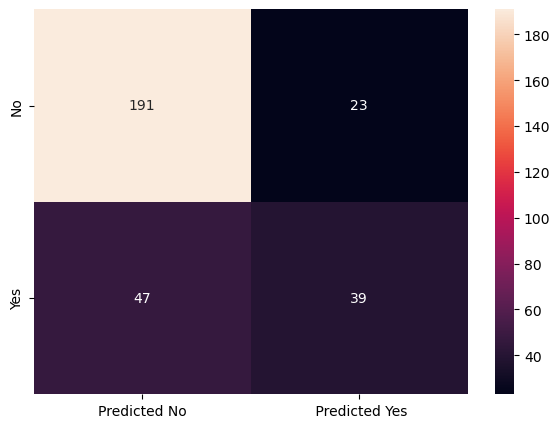

In [38]:
print('see we got improvement from 69% to all the way 76% using bagging algorithm')
y_pred = bgc1.predict(X_test)

print('score of bgc1 : '+str(bgc1.score(X_test , y_test)))

cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

successfully minimised wrong predicted values from  47 &29 to  47&23 using bagging

## Ensemble Learning - AdaBoosting

Here it builds on simple models and each model builds on the errors or residuals of the previous model in sequence. If you try to use the complex base model base_estimator=dTree, you will realise that it does quite poor, this is because the first model in the sequence does really well and the rest of the models does not really have much to do and they end up hurting the first model instead of helping. You can rather use the base_estimator=dTreeR which is a simple model and you will realise some improvement.

The best approach is to leave the AdaBoost to figure it out and start with very simple base model with a depth of 1.

simply boost the error

In [39]:
# here we are in classification problm so we will import classifier

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=10, random_state=1)
         # here don't use "base_estimator=dtree"         because our adaboost will suffer more & give low performance
    
abc1 = abc.fit(X_train,y_train)

score of dtree :0.6933333333333334
score of abc1  :0.7233333333333334


<AxesSubplot:>

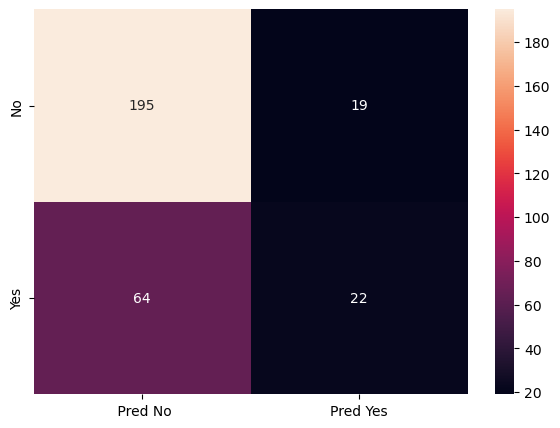

In [40]:
ypred = abc1.predict(X_test)

print('score of dtree :'+ str(dtree.score(X_test,y_test)))
print('score of abc1  :'+ str(abc1.score(X_test,y_test)))

cm = metrics.confusion_matrix(y_test,ypred , labels=[0,1])

df_cm = pd.DataFrame(cm, index= [ i for i in['No','Yes']], columns = [i for i in [' Pred No', 'Pred Yes']] )

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble Learning - GradientBoost

Gradient Boost also uses simple base leaners. The first base learner tries to predict our target (Y) and gives us (y_hat) and the next model tries to predict the difference between Y and y_hat, (Y -- y_hat), which is basically the residuals. Third model tries to predict the residuals from the second model and so on...

In [41]:
# M1 --> y- y^ =R1  ------> M2 -->R2 --------> M3 -->R3

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=10,random_state=1)

gb1 = gb.fit(X_train,y_train)

score of dtree :0.6933333333333334
score of gb1  :0.7233333333333334


<AxesSubplot:>

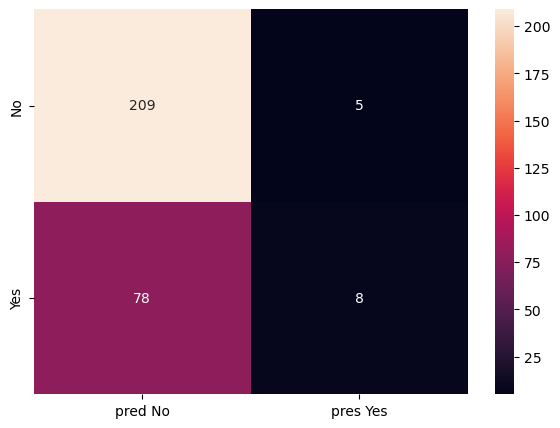

In [43]:
y_prediction = gb1.predict(X_test)

print('score of dtree :'+ str(dtree.score(X_test,y_test)))
print('score of gb1  :'+ str(gb1.score(X_test,y_test)))

cm = metrics.confusion_matrix(y_test, y_prediction,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in['No','Yes']],columns=[i for i in ['pred No','pres Yes']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - XGBoost

It is an extension of the Gradient Boost technique.

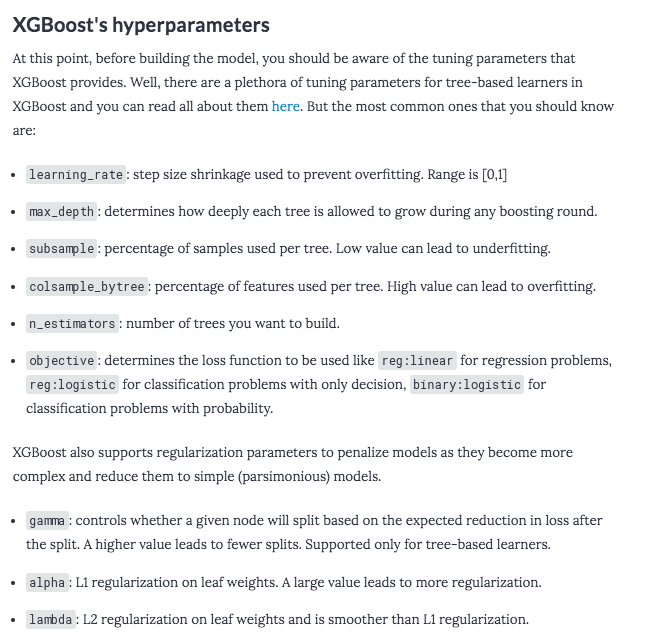

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier() 
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

score of dtree :0.6933333333333334
score of XGBoost  :0.6933333333333334


<AxesSubplot:>

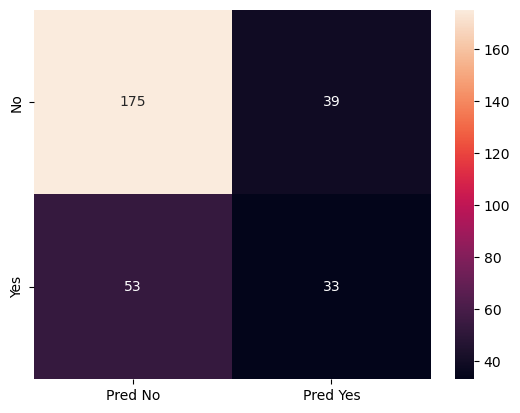

In [45]:
y_gpredict = xgb.predict(X_test)

print('score of dtree :'+ str(dtree.score(X_test,y_test)))
print('score of XGBoost  :'+ str(xgb.score(X_test,y_test)))

cm = metrics.confusion_matrix(y_test,y_gpredict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']], columns =[i for i in ['Pred No','Pred Yes']])

sns.heatmap(df_cm,annot=True,fmt='g')

we have worst model in xgboost of 69% but do not worry we will learn to tune it in future so we will get better prediction rate

You can perform hyperparameter tuning on the XGBoost model to get a better score.

# Ensemble RandomForest Classifier

In random forest we subset the rows to create different trees. Again while building the tree, we again randomly subset the initial subset to grow the tree further.

It needs to start with a complex model since it is a Bagging technique, so if you start with a simple tree with a depth of say 3, you will realise that the score will decrease. As you increase the depth, the performance will increase as well. At some point the depth wouldn't matter to improve the performance anymore, even if you increase it. It is therefore advisable to allow the algorithm to choose the best depth by itself.

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50,random_state=1,max_features=17) # max_features are the columns to be used by the algorithm

rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=17, n_estimators=50, random_state=1)

score of dtree :0.6933333333333334
score of rfc  :0.77


<AxesSubplot:>

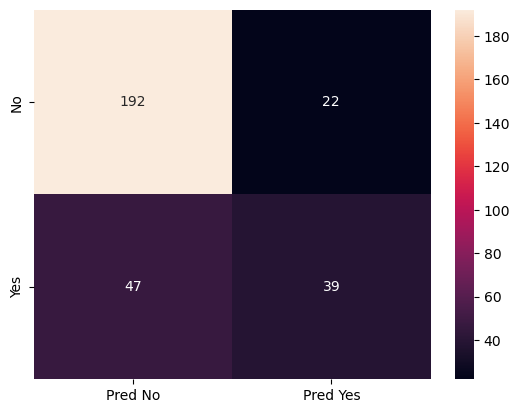

In [47]:
y_pre = rfc.predict(X_test)

print('score of dtree :'+ str(dtree.score(X_test,y_test)))
print('score of rfc  :'+ str(rfc.score(X_test,y_test)))

cm = metrics.confusion_matrix(y_test,y_pre,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']], columns =[i for i in ['Pred No','Pred Yes']])

sns.heatmap(df_cm,annot=True,fmt='g')

finally we get better prediction value among all by using RandomForest Classifier a value of 77%